In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use("ggplot")

%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [3]:
df = pd.read_csv('smoking.csv').drop(["ID", "oral"], axis = 1)
df.rename(columns = {"height(cm)" : "height_cm", "weight(kg)" : "weight_kg",
                     "waist(cm)" : "waist_cm", "eyesight(left)" : "eyesight_left",
                     "eyesight(right)" : "eyesight_right", "hearing(left)" : "hearing_left",
                     "hearing(right)" : "hearing_right", "fasting blood sugar" : "fasting_blood_sugar",
                     "Cholesterol" : "cholesterol", "HDL" : "hdl", "LDL" : "ldl",
                     "Urine protein" : "urine_protein", "serum creatinine" : "serum_creatinine",
                     "AST" : "ast", "ALT" : "alt", "Gtp" : "gtp", "dental caries" : "dental_caries"},
          inplace = True)
df['tartar'] = df['tartar'].apply(lambda x: 1 if x == "Y" else 0)

# Смотрим на исходные данные

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height_cm            55692 non-null  int64  
 3   weight_kg            55692 non-null  int64  
 4   waist_cm             55692 non-null  float64
 5   eyesight_left        55692 non-null  float64
 6   eyesight_right       55692 non-null  float64
 7   hearing_left         55692 non-null  float64
 8   hearing_right        55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting_blood_sugar  55692 non-null  float64
 12  cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  hdl                  55692 non-null  float64
 15  ldl                  55692 non-null 

In [5]:
df.head().style.background_gradient(cmap = "Oranges")

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
0,F,40,155,60,81.300000,1.200000,1.000000,1.000000,1.000000,114.000000,73.000000,94.000000,215.000000,82.000000,73.000000,126.000000,12.900000,1.000000,0.700000,18.000000,19.000000,27.000000,0,1,0
1,F,40,160,60,81.000000,0.800000,0.600000,1.000000,1.000000,119.000000,70.000000,130.000000,192.000000,115.000000,42.000000,127.000000,12.700000,1.000000,0.600000,22.000000,19.000000,18.000000,0,1,0
2,M,55,170,60,80.000000,0.800000,0.800000,1.000000,1.000000,138.000000,86.000000,89.000000,242.000000,182.000000,55.000000,151.000000,15.800000,1.000000,1.000000,21.000000,16.000000,22.000000,0,0,1
3,M,40,165,70,88.000000,1.500000,1.500000,1.000000,1.000000,100.000000,60.000000,96.000000,322.000000,254.000000,45.000000,226.000000,14.700000,1.000000,1.000000,19.000000,26.000000,18.000000,0,1,0
4,F,40,155,60,86.000000,1.000000,1.000000,1.000000,1.000000,120.000000,74.000000,80.000000,184.000000,74.000000,62.000000,107.000000,12.500000,1.000000,0.600000,16.000000,14.000000,22.000000,0,0,0


In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,55692.0,44.18,12.07,20.0,40.0,40.0,55.0,85.0
height_cm,55692.0,164.65,9.19,130.0,160.0,165.0,170.0,190.0
weight_kg,55692.0,65.86,12.82,30.0,55.0,65.0,75.0,135.0
waist_cm,55692.0,82.05,9.27,51.0,76.0,82.0,88.0,129.0
eyesight_left,55692.0,1.01,0.49,0.1,0.8,1.0,1.2,9.9
eyesight_right,55692.0,1.01,0.49,0.1,0.8,1.0,1.2,9.9
hearing_left,55692.0,1.03,0.16,1.0,1.0,1.0,1.0,2.0
hearing_right,55692.0,1.03,0.16,1.0,1.0,1.0,1.0,2.0
systolic,55692.0,121.49,13.68,71.0,112.0,120.0,130.0,240.0
relaxation,55692.0,76.00,9.68,40.0,70.0,76.0,82.0,146.0


In [7]:
df.corr().style.background_gradient(cmap = "seismic")

,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
age,1.000000,-0.479528,-0.324706,-0.026297,-0.195472,-0.192723,0.203993,0.208722,0.134023,0.050745,0.182351,0.055557,0.015102,0.007047,0.043007,-0.263078,0.029625,-0.106118,0.032576,-0.063937,0.013031,-0.114984,-0.081796,-0.162557
height_cm,-0.479528,1.000000,0.675656,0.378902,0.151133,0.155665,-0.078663,-0.078323,0.080585,0.113193,0.019619,-0.082161,0.156693,-0.213284,-0.048419,0.539367,0.005128,0.383883,0.041737,0.126511,0.139720,0.079331,0.055513,0.396675
weight_kg,-0.324706,0.675656,1.000000,0.822842,0.108433,0.113155,-0.050094,-0.052836,0.266131,0.271634,0.136237,0.026403,0.324429,-0.358868,0.040560,0.492970,0.032566,0.324808,0.120130,0.250634,0.209625,0.073536,0.059921,0.302780
waist_cm,-0.026297,0.378902,0.822842,1.000000,0.027458,0.037996,0.023790,0.019286,0.316922,0.292627,0.211132,0.065467,0.361922,-0.376203,0.072817,0.387066,0.045492,0.235024,0.142690,0.252478,0.243141,0.044203,0.046197,0.226259
eyesight_left,-0.195472,0.151133,0.108433,0.027458,1.000000,0.354574,-0.046571,-0.048788,-0.019330,0.005199,-0.041851,-0.004985,0.019717,-0.015296,-0.007257,0.095234,-0.002752,0.071410,-0.007966,0.019326,0.003850,0.003684,0.012532,0.061204
eyesight_right,-0.192723,0.155665,0.113155,0.037996,0.354574,1.000000,-0.043877,-0.046623,-0.013720,0.011357,-0.044006,-0.007851,0.019881,-0.022220,-0.006172,0.096119,-0.013511,0.047608,-0.006921,0.024182,0.012195,0.016359,0.006568,0.063017
hearing_left,0.203993,-0.078663,-0.050094,0.023790,-0.046571,-0.043877,1.000000,0.510095,0.055219,0.008754,0.042314,-0.023276,0.004750,-0.020159,-0.016706,-0.026116,0.014527,0.003349,0.018074,0.004820,0.012864,-0.016100,-0.035396,-0.023209
hearing_right,0.208722,-0.078323,-0.052836,0.019286,-0.048788,-0.046623,0.510095,1.000000,0.049095,0.001651,0.041339,-0.023058,0.000267,-0.017986,-0.015426,-0.030943,0.019461,0.008060,0.009393,-0.005081,0.009245,-0.016376,-0.026698,-0.018855
systolic,0.134023,0.080585,0.266131,0.316922,-0.019330,-0.013720,0.055219,0.049095,1.000000,0.761051,0.172700,0.059572,0.198826,-0.088487,0.016569,0.186514,0.046170,0.072288,0.083204,0.094893,0.165724,0.029894,0.006542,0.073109
relaxation,0.050745,0.113193,0.271634,0.292627,0.005199,0.011357,0.008754,0.001651,0.761051,1.000000,0.147879,0.095357,0.215541,-0.089410,0.041017,0.232899,0.045665,0.085033,0.085151,0.106648,0.177648,0.031634,0.021659,0.108309


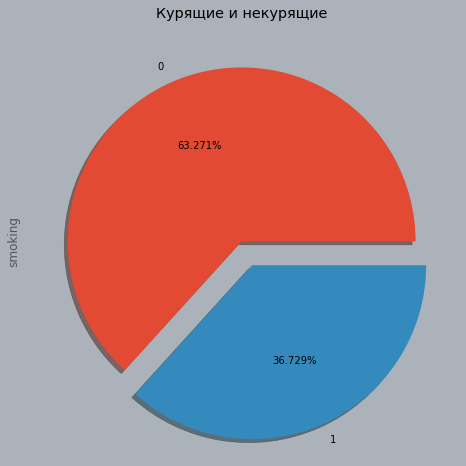

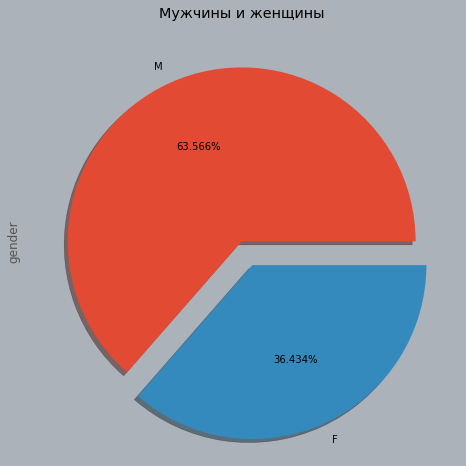

In [8]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df["smoking"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True). \
            set(title = "Курящие и некурящие");

plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df["gender"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True). \
            set(title = "Мужчины и женщины");

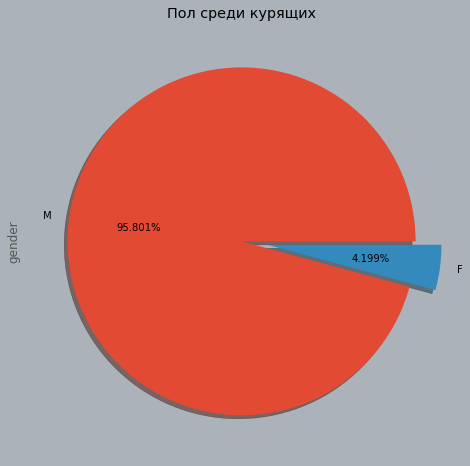

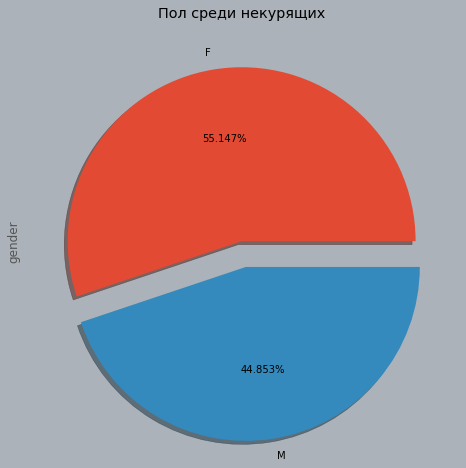

In [9]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df[df.smoking == 1]["gender"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True). \
            set(title = "Пол среди курящих");

plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df[df.smoking == 0]["gender"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True). \
            set(title = "Пол среди некурящих");

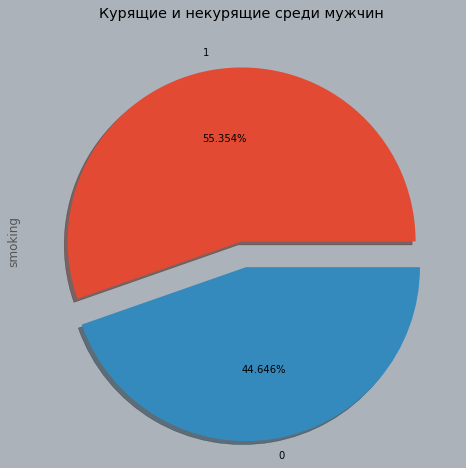

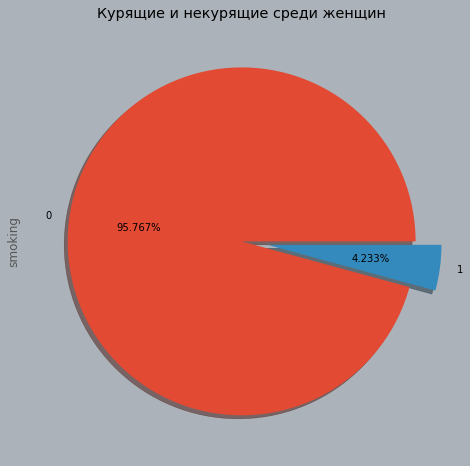

In [10]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df[df.gender == "M"]["smoking"].value_counts(). \
                plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True). \
                set(title = "Курящие и некурящие среди мужчин");

plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df[df.gender == "F"]["smoking"].value_counts(). \
                plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True). \
                set(title = "Курящие и некурящие среди женщин");

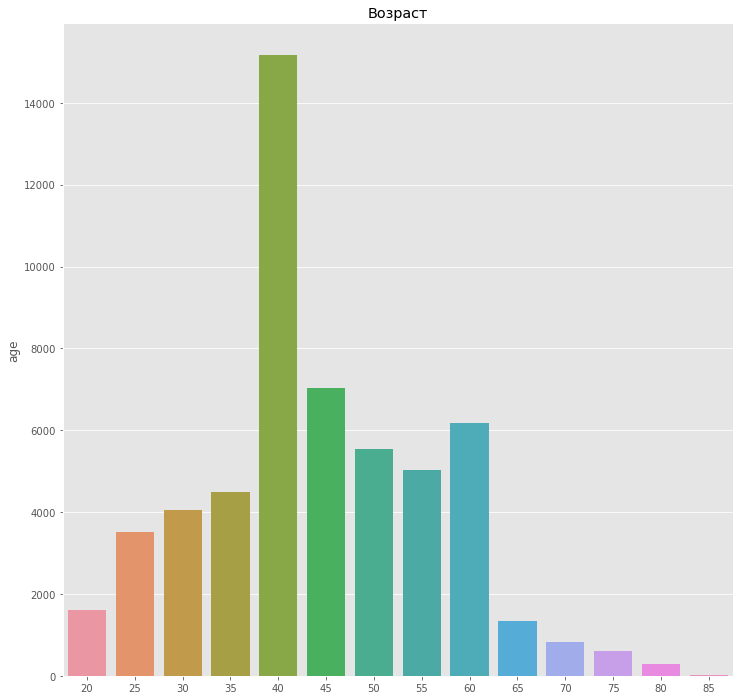

In [11]:
fig, axes = plt.subplots(figsize = (12, 12))

sns.barplot(ax = axes,
            x = df["age"].value_counts().index,
            y = df["age"].value_counts(),
            data = df).set(title =  "Возраст");

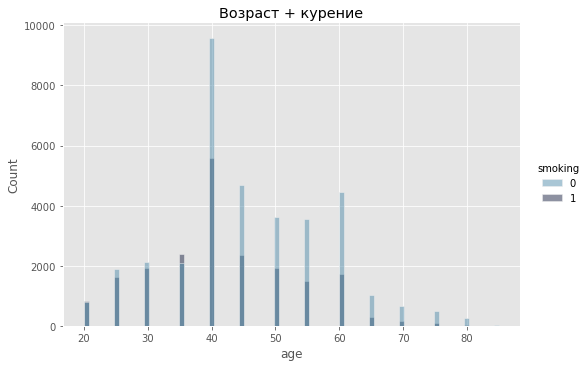

In [12]:
sns.displot(data = df, x = "age", hue = "smoking", kind = "hist", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title =  "Возраст + курение");

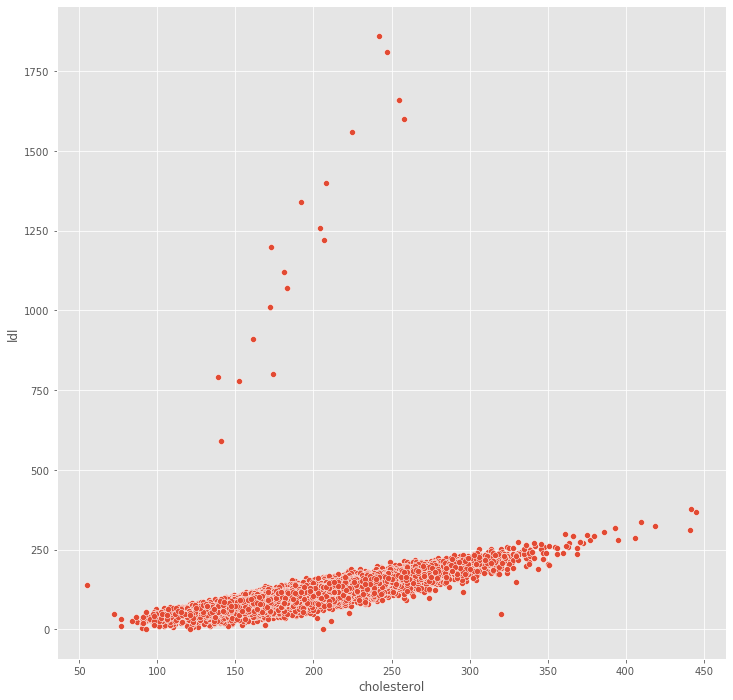

In [13]:
fig, axes = plt.subplots(figsize = (12, 12))
sns.scatterplot(ax = axes,
            x = df["cholesterol"],
            y = df["ldl"],
            data = df);

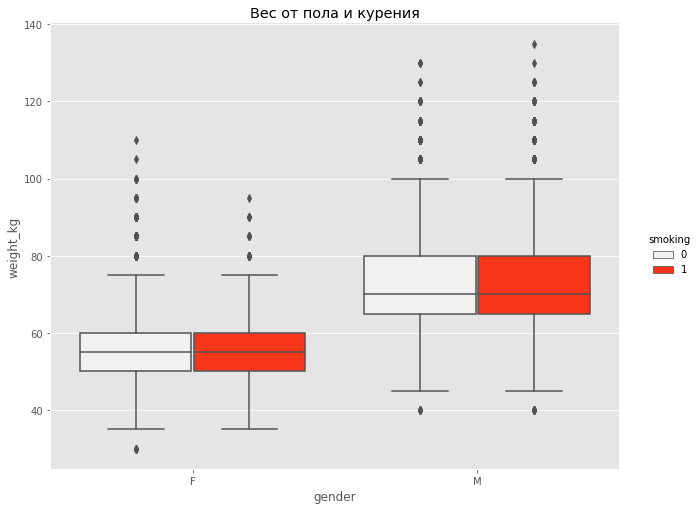

In [14]:
sns.catplot(x = "gender",
            y = "weight_kg",
            kind = "box",
            hue = "smoking",
            color = '#F83419',
            data = df, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True).set(title = "Вес от пола и курения");

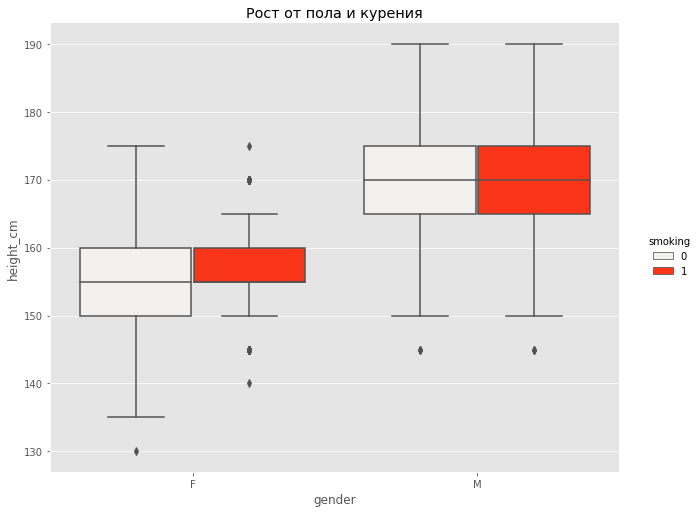

In [15]:
sns.catplot(x = "gender",
            y = "height_cm",
            kind = "box",
            hue = "smoking",
            color = '#F83419',
            data = df, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True).set(title = "Рост от пола и курения");

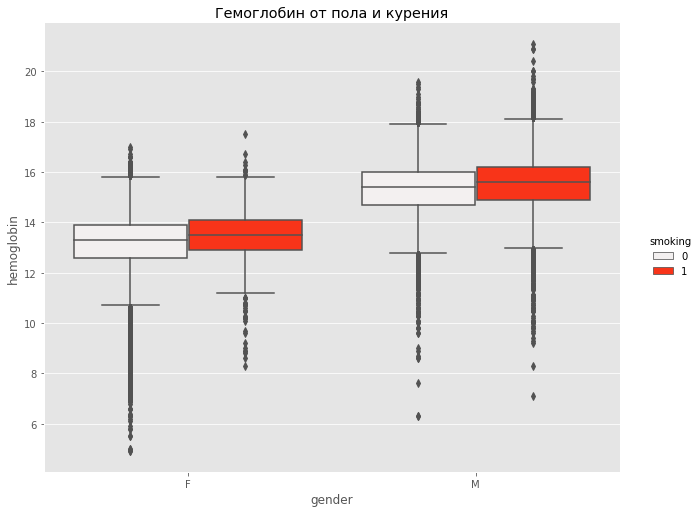

In [16]:
sns.catplot(x = "gender",
            y = "hemoglobin",
            kind = "box",
            hue = "smoking",
            color = '#F83419',
            data = df, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True).set(title = "Гемоглобин от пола и курения");

# Подготовка данных

In [17]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == "M" else 0)

In [18]:
def outlier_detection(df):
    bad = set()
    for feature in df:
        if type(df[feature][0]) != str:
            lower_bound = df[feature].mean()-3*df[feature].std()
            upper_bound = df[feature].mean()+3*df[feature].std()
            for i in range (len(df[feature])):
                if df[feature][i] < lower_bound or df[feature][i] > upper_bound: bad.add(i)
    print(f"Удалено {len(bad)} выбросов, что составлеет {float('{:.2f}'.format(100 * len(bad)/len(df)))}%")
    return df.drop(labels = list(bad), axis = 0)

clean_df = outlier_detection(df)


Удалено 8183 выбросов, что составлеет 14.69%


In [19]:
normalized_np = preprocessing.normalize(clean_df, axis = 0)
clean_df = pd.DataFrame(normalized_np, columns=clean_df.columns)

In [20]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47509 entries, 0 to 47508
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               47509 non-null  float64
 1   age                  47509 non-null  float64
 2   height_cm            47509 non-null  float64
 3   weight_kg            47509 non-null  float64
 4   waist_cm             47509 non-null  float64
 5   eyesight_left        47509 non-null  float64
 6   eyesight_right       47509 non-null  float64
 7   hearing_left         47509 non-null  float64
 8   hearing_right        47509 non-null  float64
 9   systolic             47509 non-null  float64
 10  relaxation           47509 non-null  float64
 11  fasting_blood_sugar  47509 non-null  float64
 12  cholesterol          47509 non-null  float64
 13  triglyceride         47509 non-null  float64
 14  hdl                  47509 non-null  float64
 15  ldl                  47509 non-null 

In [21]:
clean_df.head()

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
0,0.000000,0.004077,0.004310,0.004136,0.004550,0.005197,0.004354,0.004588,0.004588,0.004314,...,0.004852,0.004023,0.004384,0.003562,0.003189,0.003028,0.002856,0.0,0.006142,0.000000
1,0.000000,0.004077,0.004449,0.004136,0.004533,0.003465,0.002612,0.004588,0.004588,0.004503,...,0.004891,0.003960,0.004384,0.003053,0.003898,0.003028,0.001904,0.0,0.006142,0.000000
2,0.005775,0.005606,0.004727,0.004136,0.004477,0.003465,0.003483,0.004588,0.004588,0.005222,...,0.005815,0.004927,0.004384,0.005088,0.003721,0.002550,0.002327,0.0,0.000000,0.007663
3,0.000000,0.004077,0.004310,0.004136,0.004813,0.004331,0.004354,0.004588,0.004588,0.004541,...,0.004120,0.003898,0.004384,0.003053,0.002835,0.002231,0.002327,0.0,0.000000,0.000000
4,0.005775,0.003058,0.005005,0.005170,0.004757,0.005197,0.005225,0.004588,0.004588,0.004843,...,0.004968,0.005052,0.004384,0.006106,0.003189,0.004303,0.003491,0.0,0.006142,0.000000


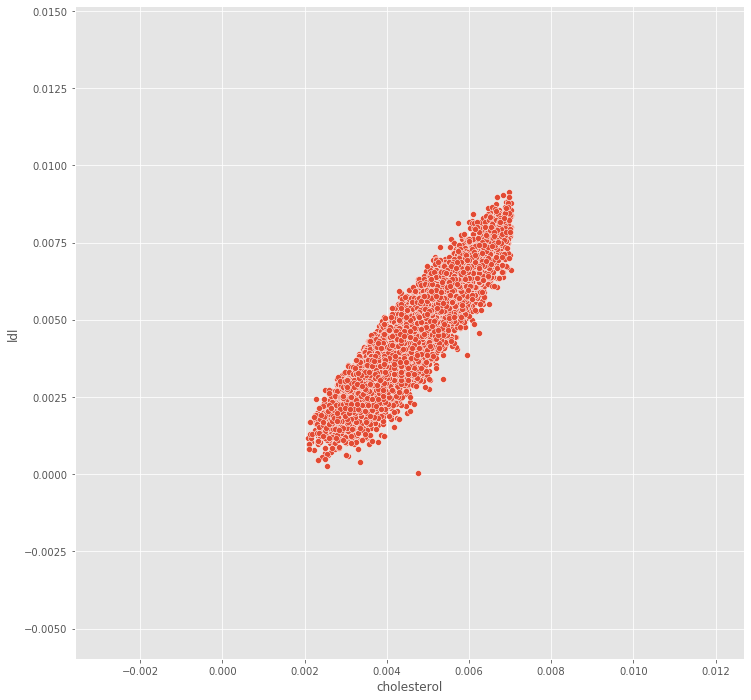

In [22]:
fig, axes = plt.subplots(figsize = (12, 12))
sns.scatterplot(ax = axes,
            x = clean_df["cholesterol"],
            y = clean_df["ldl"],
            data = clean_df);

# Обучение моделей

In [23]:
X = clean_df.drop(columns="smoking")           
y = clean_df['smoking'].apply(lambda x: 1 if x else 0)   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [24]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SVM=SVC()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()

### 1. Логистическая регрессия

In [25]:
LR_params = [{'penalty':['l1','l2','none'], 
                'C':[0.01, 0.1, 1, 10, 100],
                'solver' : ['saga'],
                'max_iter' : [50,100,200,500,1000]}]
LR_grid = GridSearchCV(LR, LR_params, cv=5)
os.system('cls||clear')
LR_grid.fit(X_train, y_train)

contrib/python/scikit-learn/py3/sklearn/linear_model/_logistic.py:1504: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
contrib/python/scikit-learn/py3/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
contrib/python/scikit-learn/py3/sklearn/linear_model/_logistic.py:1504: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
contrib/python/scikit-learn/py3/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
contrib/python/scikit-learn/py3/sklearn/linear_model/_logistic.py:1504: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
contrib/python/scikit-learn/py3/sklearn/linear_model/_sag.py:329: ConvergenceWarning: T

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'max_iter': [50, 100, 200, 500, 1000],
                          'penalty': ['l1', 'l2', 'none'],
                          'solver': ['saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
LR_pred = LR_grid.predict(X_test)
print("LR ", LR_grid.best_params_,":",accuracy_score(y_test,LR_pred)*100)

LR  {'C': 1, 'max_iter': 1000, 'penalty': 'none', 'solver': 'saga'} : 74.95264154914754


### 2. KNN

In [32]:
k_range = list(range(1, 30))
KNN_params = dict(n_neighbors=k_range)
KNN_grid = GridSearchCV(KNN, KNN_params, cv=5)
os.system('cls||clear')
KNN_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
KNN_pred = KNN_grid.predict(X_test)
print("KNN ", KNN_grid.best_params_,":",accuracy_score(y_test,KNN_pred)*100)

KNN  {'n_neighbors': 1} : 80.76194485371501


### 3. SVM

In [ ]:
SVM_params = [{'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 
                'C':[0.01, 0.1, 1, 10, 100, 1000],
                'kernel' : ['rbf']}]
SVM_grid = GridSearchCV(SVM, SVM_params, cv=5)
os.system('cls||clear')
SVM_grid.fit(X_train, y_train)

In [ ]:
SVM_pred = SVM_grid.predict(X_test)
print("SVM ", SVM_grid.best_params_,":",accuracy_score(y_test,SVM_pred)*100)

### 4. Tree

In [ ]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2)}